[19.5, 19.0125, 18.525, 18.037499999999998, 17.55, 17.0625, 16.575, 16.0875, 15.6, 15.112499999999999, 14.625, 14.1375, 13.65, 13.1625, 12.674999999999999]
[array([48.43247344]), array([48.22671106]), array([48.27778274]), array([48.38498923]), array([48.25065276]), array([48.34412047]), array([48.3086932]), array([48.38498923]), array([48.25065276]), array([48.38498923]), array([48.43247344]), array([48.43247344]), array([48.4880815]), array([48.55377747]), array([48.72670585])]
[0.39333958357952437, 0.22734122844116447, 0.2685543493616926, 0.3550424106345104, 0.24666228580424154, 0.3220756625029369, 0.2934944720285151, 0.3550424106345104, 0.24666228580424154, 0.3550424106345104, 0.388896098224609, 0.37832773723437263, 0.421458118110938, 0.47240217168008114, 0.6064446999658725]


Text(0, 0.5, 'Concentration (%)')

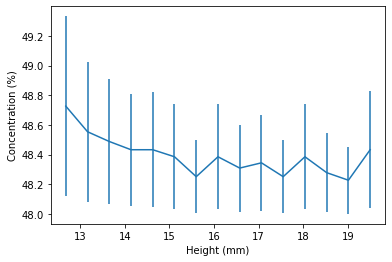

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/40
metres = 0.0195/40

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(nj - b)/a]
    return Concs

Concentrations = Conc(0.00408986804361503 , 1.2439106252492291, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, V_err):
    ConcErra = abs(np.array(f(0.00408986804361503 + Erra, 1.2439106252492291, H_new2, V_new2, 1.571, 1.44)) - np.array(f(0.00408986804361503, 1.2439106252492291, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(0.00408986804361503, 1.2439106252492291 + Errb, H_new2, V_new2, 1.571, 1.44)) - np.array(f(0.00408986804361503, 1.2439106252492291, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(0.00408986804361503, 1.2439106252492291, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(0.00408986804361503, 1.2439106252492291, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrC**2)
    return ConcErrTot

def ConcErri(a, b, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(nj - b)/a]
    return Concs

def ConcErri1(a, b, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(nj - b)/a]
    return Concs

ConcErr2 = ConcErrX(Conc, 0.00026576887304368747, 0.006887314993429577, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
ConcErr3i = abs(np.array(ConcErri(0.00408986804361503, 1.2439106252492291, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(0.00408986804361503, 1.2439106252492291, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(0.00408986804361503, 1.2439106252492291, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(0.00408986804361503, 1.2439106252492291, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

print(V_new2mm[0:len(V_new2mm)-3])
print(Concentrations[0:len(Concentrations)-2])
print(ConcErr3[0:len(ConcErr3)-2])


plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")


[19.5, 19.0125, 18.525, 18.037499999999998, 17.55, 17.0625, 16.575, 16.0875, 15.6, 15.112499999999999, 14.625, 14.1375, 13.65, 13.1625, 12.674999999999999]
[array([69.69275796]), array([69.18273314]), array([69.3093249]), array([69.57505848]), array([69.2420776]), array([69.47375677]), array([69.38594292]), array([69.57505848]), array([69.2420776]), array([69.57505848]), array([69.69275796]), array([69.69275796]), array([69.8305941]), array([69.99343523]), array([70.42207418])]
[0.9749739352549915, 0.5635125001198177, 0.6656677887443734, 0.8800464299285677, 0.611403757742912, 0.7983314907254095, 0.7274870679558105, 0.8800464299285677, 0.611403757742912, 0.8800464299285677, 0.9639598329790384, 0.937763953047307, 1.044671569081245, 1.1709469973870945, 1.5031992718849294]


Text(0, 0.5, 'Concentration (%)')

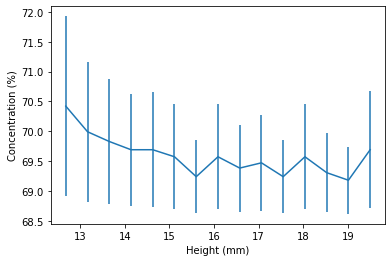

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/40
metres = 0.0195/40

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(nj - b)/a]
    return Concs

Concentrations = Conc(0.00165 , 1.3270, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, V_err):
    ConcErra = abs(np.array(f(0.00165 + Erra, 1.3270, H_new2, V_new2, 1.571, 1.44)) - np.array(f(0.00165, 1.3270, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(0.00165, 1.3270 + Errb, H_new2, V_new2, 1.571, 1.44)) - np.array(f(0.00165, 1.3270, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(0.00165, 1.3270, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(0.00165, 1.3270, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrC**2)
    return ConcErrTot

def ConcErri(a, b, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(nj - b)/a]
    return Concs

def ConcErri1(a, b, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(nj - b)/a]
    return Concs

ConcErr2 = ConcErrX(Conc, 0.00026576887304368747, 0.006887314993429577, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
ConcErr3i = abs(np.array(ConcErri(0.00165, 1.3270, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(0.00165, 1.3270, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(0.00165, 1.3270, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(0.00165, 1.3270, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3
    
print(V_new2mm[0:len(V_new2mm)-3])
print(Concentrations[0:len(Concentrations)-2])
print(ConcErr3[0:len(ConcErr3)-2])

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[19.5, 19.0125, 18.525, 18.037499999999998, 17.55, 17.0625, 16.575, 16.0875, 15.6, 15.112499999999999, 14.625, 14.1375, 13.65, 13.1625, 12.674999999999999]
[3.78615447 3.78276434 3.78360738 3.78537363 3.78315968 3.78470085
 3.78411711 3.78537363 3.78315968 3.78537363 3.78615447 3.78615447
 3.78706775 3.78814512 3.79097283]
[0.00646147 0.00375409 0.0044289  0.00583936 0.00407066 0.00530264
 0.00483641 0.00583936 0.00407066 0.00583936 0.00638821 0.00621508
 0.00691393 0.00773687 0.00988922]


Text(0, 0.5, 'Concentration (%)')

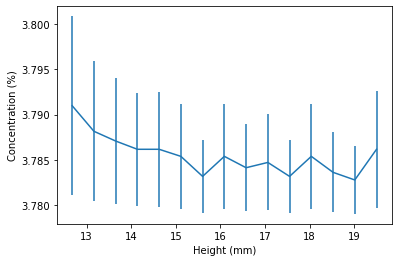

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/40
metres = 0.0195/40

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)

Conc3 = []
for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []
for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []
for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    

ln_Conc = []
for i in range(0, len(Concentrations)):
    ln_Conc = ln_Conc +[(Concentrations[i])[0]]
ln_Conc2 = np.log(ln_Conc)
    
ln_ConcErr3 = np.array(ConcErr3)/np.array(ln_Conc)

print(V_new2mm[0:len(V_new2mm)-3])
print(ln_Conc2[0:len(ln_Conc2)-2])
print(ln_ConcErr3[0:len(ln_ConcErr3)-2])

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], ln_Conc2[0:len(ln_Conc2)-2], xerr = None, yerr = ln_ConcErr3[0:len(ln_ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[array([566], dtype=int64), array([547], dtype=int64), array([522], dtype=int64), array([500], dtype=int64), array([480], dtype=int64), array([440], dtype=int64), array([420], dtype=int64), array([402], dtype=int64), array([382], dtype=int64), array([365], dtype=int64), array([348], dtype=int64), array([332], dtype=int64), array([312], dtype=int64), array([294], dtype=int64), array([272], dtype=int64), array([258], dtype=int64), array([243], dtype=int64)]
[array([41.]), array([40.]), array([39.]), array([38.]), array([37.]), array([35.]), array([34.]), array([33.]), array([32.]), array([31.]), array([30.]), array([29.]), array([28.]), array([27.]), array([26.]), array([25.]), array([24.])]


Text(0, 0.5, 'Concentration (%)')

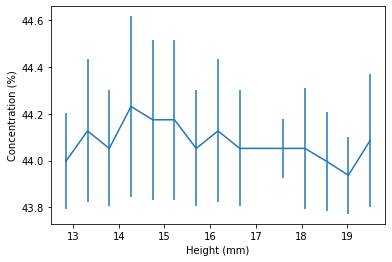

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data9.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/41
metres = 0.0195/41

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
print(H_new2)
print(V_new2)

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[array([558], dtype=int64), array([538], dtype=int64), array([515], dtype=int64), array([495], dtype=int64), array([477], dtype=int64), array([454], dtype=int64), array([438], dtype=int64), array([419], dtype=int64), array([404], dtype=int64), array([382], dtype=int64), array([366], dtype=int64), array([350], dtype=int64), array([333], dtype=int64), array([312], dtype=int64), array([292], dtype=int64), array([279], dtype=int64)]
[array([42.]), array([41.]), array([40.]), array([39.]), array([38.]), array([37.]), array([36.]), array([35.]), array([34.]), array([33.]), array([32.]), array([31.]), array([30.]), array([29.]), array([28.]), array([27.])]


Text(0, 0.5, 'Concentration (%)')

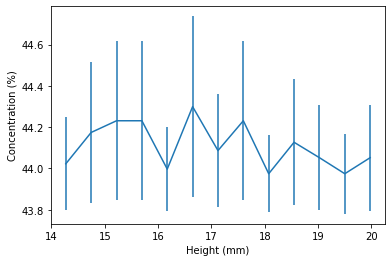

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data18.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/41
metres = 0.0195/41

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
print(H_new2)
print(V_new2)

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[array([565], dtype=int64), array([540], dtype=int64), array([518], dtype=int64), array([500], dtype=int64), array([486], dtype=int64), array([461], dtype=int64), array([444], dtype=int64), array([427], dtype=int64), array([410], dtype=int64), array([391], dtype=int64), array([375], dtype=int64), array([359], dtype=int64), array([342], dtype=int64), array([322], dtype=int64), array([302], dtype=int64), array([291], dtype=int64)]
[array([43.]), array([42.]), array([41.]), array([40.]), array([39.]), array([38.]), array([37.]), array([36.]), array([35.]), array([34.]), array([33.]), array([32.]), array([31.]), array([30.]), array([29.]), array([28.])]


Text(0, 0.5, 'Concentration (%)')

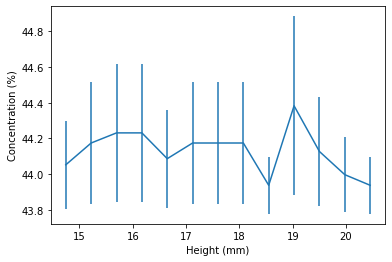

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data27.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/41
metres = 0.0195/41

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
print(H_new2)
print(V_new2)

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[array([558], dtype=int64), array([533], dtype=int64), array([513], dtype=int64), array([495], dtype=int64), array([480], dtype=int64), array([456], dtype=int64), array([439], dtype=int64), array([422], dtype=int64), array([407], dtype=int64), array([389], dtype=int64), array([369], dtype=int64), array([353], dtype=int64), array([337], dtype=int64), array([315], dtype=int64), array([300], dtype=int64)]
[array([43.]), array([42.]), array([41.]), array([40.]), array([39.]), array([38.]), array([37.]), array([36.]), array([35.]), array([34.]), array([33.]), array([32.]), array([31.]), array([30.]), array([29.])]


Text(0, 0.5, 'Concentration (%)')

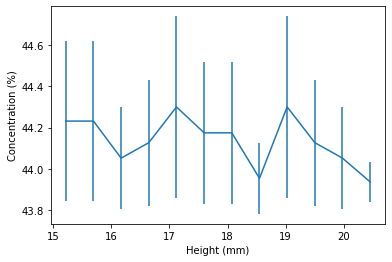

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data36.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/41
metres = 0.0195/41

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
print(H_new2)
print(V_new2)

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[array([558], dtype=int64), array([535], dtype=int64), array([514], dtype=int64), array([496], dtype=int64), array([481], dtype=int64), array([457], dtype=int64), array([441], dtype=int64), array([425], dtype=int64), array([409], dtype=int64), array([390], dtype=int64), array([371], dtype=int64), array([355], dtype=int64), array([340], dtype=int64), array([320], dtype=int64), array([310], dtype=int64), array([297], dtype=int64)]
[array([43.]), array([42.]), array([41.]), array([40.]), array([39.]), array([38.]), array([37.]), array([36.]), array([35.]), array([34.]), array([33.]), array([32.]), array([31.]), array([30.]), array([29.]), array([28.])]


Text(0, 0.5, 'Concentration (%)')

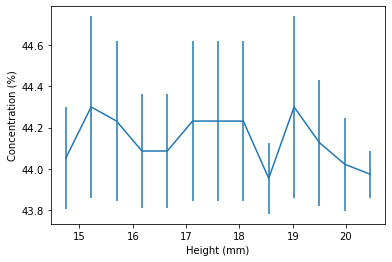

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data44.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/41
metres = 0.0195/41

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
print(H_new2)
print(V_new2)

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[array([579], dtype=int64), array([560], dtype=int64), array([535], dtype=int64), array([512], dtype=int64), array([492], dtype=int64), array([468], dtype=int64), array([447], dtype=int64), array([426], dtype=int64), array([405], dtype=int64), array([363], dtype=int64), array([345], dtype=int64), array([325], dtype=int64), array([308], dtype=int64), array([292], dtype=int64), array([275], dtype=int64), array([258], dtype=int64), array([237], dtype=int64)]
[array([39.]), array([38.]), array([37.]), array([36.]), array([35.]), array([34.]), array([33.]), array([32.]), array([31.]), array([29.]), array([28.]), array([27.]), array([26.]), array([25.]), array([24.]), array([23.]), array([22.])]


Text(0, 0.5, 'Concentration (%)')

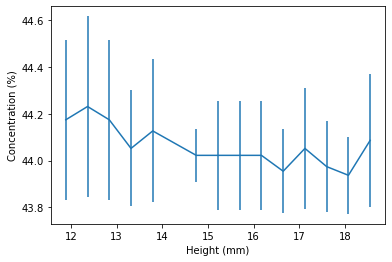

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data1.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/41
metres = 0.0195/41

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
print(H_new2)
print(V_new2)

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")

[array([579], dtype=int64), array([558], dtype=int64), array([534], dtype=int64), array([511], dtype=int64), array([491], dtype=int64), array([467], dtype=int64), array([446], dtype=int64), array([425], dtype=int64), array([405], dtype=int64), array([385], dtype=int64), array([367], dtype=int64), array([348], dtype=int64), array([330], dtype=int64), array([313], dtype=int64), array([290], dtype=int64), array([271], dtype=int64), array([253], dtype=int64)]
[array([40.]), array([39.]), array([38.]), array([37.]), array([36.]), array([35.]), array([34.]), array([33.]), array([32.]), array([31.]), array([30.]), array([29.]), array([28.]), array([27.]), array([26.]), array([25.]), array([24.])]


Text(0, 0.5, 'Concentration (%)')

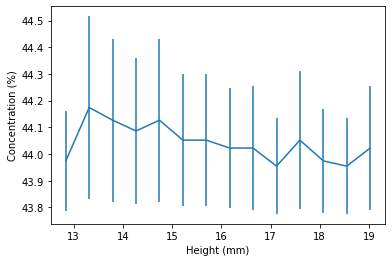

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\sbila\OneDrive\Documents\Level 2\Level 2 Labs\RLI\March_9_data2.xlsx')

H = pd.DataFrame(df, columns = ['Horizontal'])
V = pd.DataFrame(df, columns = ['Vertical'])
Err = pd.DataFrame(df, columns = ['V Error'])

H = pd.DataFrame.to_numpy(H)
V = pd.DataFrame.to_numpy(V)
Err = pd.DataFrame.to_numpy(Err)

mm = 19.5/41
metres = 0.0195/41

H = H[::-1]
V = V[::-1]
Err = Err[::-1]

H_new = [H[0]]
V_new = [V[0]]
Err_new = [Err[0]]

for i in range(0, len(H)-1):
    if V[i] == V[i+1]:
        H_new = H_new
        V_new = V_new
        Err_new = Err_new
    else:
        H_new = H_new + [H[i+1]]
        V_new = V_new + [V[i+1]]
        Err_new = Err_new + [Err[i+1]]
        
H_new2 = []
V_new2 = []
Err_new2 = []

for i in range(0, len(H_new)):
    if (V_new[i]*2) % 2 != 0:
        H_new2 = H_new2
        V_new2 = V_new2
        Err_new2 = Err_new2
    else:
        H_new2 = H_new2 + [H_new[i]]
        V_new2 = V_new2 + [V_new[i]]
        Err_new2 = Err_new2 + [Err_new[i]]


def Conc(a, b, c, H, V, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

Concentrations = Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)

def ConcErrX(f, Erra, Errb, Errc, V_err):
    ConcErra = abs(np.array(f(3.080e-05 + Erra, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrb = abs(np.array(f(3.080e-05, 0.002929 + Errb, 1.253, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrc = abs(np.array(f(3.080e-05, 0.002929, 1.253 + Errc, H_new2, V_new2, 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrC = abs(np.array(f(3.080e-05, 0.002929, 1.253, H_new2, np.array(V_new2) + np.array(V_err), 1.571, 1.44)) - np.array(f(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
    ConcErrTot = np.sqrt(ConcErra**2 + ConcErrb**2 + ConcErrc**2 + ConcErrC**2)
    return ConcErrC

def ConcErri(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/((V[i]+V_err[i])-V[i+1])))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

def ConcErri1(a, b, c, H, V, V_err, theta0, n0):
    Concs = []
    for i in range(0, len(H)-1):
        nj = n0*np.sin(theta0)/np.sin(np.arctan((H[i]-H[i+1])/(V[i]-(V[i+1]+V_err[i+1]))))
        Concs = Concs + [(-b + np.sqrt(b**2 - 4*a*(c-nj)))/(2*a)]
    return Concs

ConcErr2 = ConcErrX(Conc, 1.702e-05, 6.947e-04, 0.008389, Err_new2)
Conc2 = []

for i in range (0, len(ConcErr2)):
    Conc2 = Conc2 + [(ConcErr2[i])[0]]

ConcErr2 = Conc2

ConcErr3i = abs(np.array(ConcErri(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3i_1 = abs(np.array(ConcErri1(3.080e-05, 0.002929, 1.253, H_new2, V_new2, Err_new2, 1.571, 1.44)) - np.array(Conc(3.080e-05, 0.002929, 1.253, H_new2, V_new2, 1.571, 1.44)))
ConcErr3 = np.sqrt(ConcErr3i**2+ConcErr3i_1**2)
Conc3 = []

for i in range (0, len(ConcErr3)):
    Conc3 = Conc3 + [(ConcErr3[i])[0]]

ConcErr3 = Conc3

V_new2mm = []

for i in range(0, len(V_new2)):
    V_new2mm = V_new2mm + [mm*(V_new2[i])[0]]

V_new2m = []

for i in range(0, len(V_new2)):
    V_new2m = V_new2m + [metres*(V_new2[i])[0]]
    
print(H_new2)
print(V_new2)

plt.errorbar(V_new2mm[0:len(V_new2mm)-3], Concentrations[0:len(Concentrations)-2], xerr = None, yerr = ConcErr3[0:len(ConcErr3)-2])
plt.xlabel("Height (mm)")
plt.ylabel("Concentration (%)")